In [9]:
#exclude some entries from one coordinate in xarray
import xarray as xr
import numpy as np


def test_exclude_vindex():
    #4-dimensional data
    data = xr.DataArray(np.random.randn(2, 3, 4, 5), dims=['A', 'B', 'C', 'D'])
    #set coordinate
    data.coords['E'] = ('D', np.arange(5))
    exclude_coord = 'D'
    exclude_values = [3, 4]
    data = data.sel(D=~data['D'].isin(exclude_values))
    print(data)

test_exclude_vindex()

<xarray.DataArray (A: 2, B: 3, C: 4, D: 3)>
array([[[[-1.64194196,  0.77253002,  0.40424389],
         [ 0.45062364, -0.2743309 ,  1.15741905],
         [ 0.4963483 , -0.55721184, -0.73369435],
         [ 0.6652835 ,  1.33909578, -1.50820492]],

        [[ 3.02249407,  0.11656415,  1.33862326],
         [ 0.59103512,  0.75753429, -0.01700173],
         [-0.7930835 , -1.12124793, -0.52421847],
         [ 1.94345763,  1.7937883 , -2.75920537]],

        [[ 0.81829102, -0.38230814, -0.39260595],
         [-0.31185978, -0.34474599, -0.42031363],
         [ 0.43919299, -1.00230841,  0.30192211],
         [ 0.15820249,  1.8139764 ,  0.88037429]]],


       [[[ 0.3318776 ,  1.32907577,  0.94206487],
         [-2.15570088, -1.91589341,  1.11156737],
         [-0.58259736, -0.42388648,  0.99888716],
         [-1.81043571,  2.32926338,  1.6222835 ]],

        [[ 0.518933  ,  0.5969965 , -0.14985218],
         [ 0.19593564,  1.11320405,  0.38847339],
         [ 0.05743505, -0.93183449, -0.7797151

In [5]:
data = xr.DataArray(np.random.randn(2, 3, 4, 5), dims=['A', 'B', 'C', 'D'])
#set coordinate
data.coords['E'] = ('D', np.arange(5))

In [10]:
#change datetime.datetime to datetime.date
import datetime
x = datetime.datetime(2019, 1, 1)
print(x.date())



2019-01-01


In [42]:
#aggregate and plot data based on each dimension:

def filter_fun_wrapper(conditions):
    def filter_func(x):
        for i, cond in conditions.items():
            if cond(x):
                return i
    return filter_func



data = xr.DataArray(np.random.randn(2, 3, 4, 5), dims=['A', 'B', 'C', 'D'])
data.coords['E'] = ('D', np.arange(5))

#aggregate data based D dimension % 2
conditions = {0: lambda x: x % 2 == 0, 1: lambda x: x % 2 == 1}
filt_func = filter_fun_wrapper(conditions)
data_agg = data.groupby(xr.apply_ufunc(filt_func, data['D'],vectorize=True)).std()


def view_data_category(data, coor, conditions, agg_func = np.mean):
    filt_func = filter_fun_wrapper(conditions)
    data_agg = data.groupby(xr.apply_ufunc(filt_func, data[coor],vectorize=True)).reduce(agg_func)
    return data_agg

view_data_category(data, 'D', conditions, np.std)

<xarray.DataArray (A: 2, B: 3, C: 4, D: 2)>
array([[[[3.73770431e-01, 1.37323484e-01],
         [8.36115504e-01, 6.51426270e-01],
         [9.01467816e-01, 6.83870293e-02],
         [2.39132996e-01, 4.42507445e-01]],

        [[1.05984461e+00, 7.90864638e-01],
         [6.90443873e-01, 2.93137492e-01],
         [1.97760057e-01, 3.68798822e-02],
         [1.58859779e+00, 2.34608454e-01]],

        [[3.53077838e-01, 3.90110156e-01],
         [1.15747965e+00, 6.40496837e-01],
         [1.77780415e-01, 9.35600038e-04],
         [5.44636939e-01, 1.02574811e-01]]],


       [[[1.48202396e+00, 5.82750438e-01],
         [7.43770980e-01, 2.07397806e-01],
         [2.45270804e-01, 4.53126300e-01],
         [7.30488490e-01, 4.12412671e-01]],

        [[7.88460781e-01, 4.50784986e-01],
         [6.42556939e-01, 3.37573847e-01],
         [7.08996841e-01, 1.39240503e-02],
         [5.98157126e-01, 2.17701072e-01]],

        [[4.62607946e-01, 1.52527485e+00],
         [3.44433482e-01, 1.81709040e-01],
         [1.00502057e+00, 4.99107425e-01],
         [4.19051362e-01, 3.57775785e-01]]]])
Coordinates:
    E        (D) int64 0 1 2 3 4
  * D        (D) int64 0 1
Dimensions without coordinates: A, B, C

In [43]:
#exlude some values in one coordinate
exclude = [3, 4]
data = data.sel(D=~data['D'].isin(exclude))

<xarray.DataArray (A: 2, B: 3, C: 4)>
array([[[-0.79685587, -0.65504007,  0.70061817,  0.76440108],
        [ 0.75215128,  1.69900614,  0.49122975, -1.0095188 ],
        [-0.88335993,  1.19359425, -0.31669669, -0.35314865]],

       [[ 1.74144844, -1.10007715,  0.70315567,  0.14022566],
        [ 0.01285384, -0.4669358 ,  0.50648836, -0.39893283],
        [-1.48871295, -0.02102195, -1.36570141,  0.28675129]]])
Coordinates:
    E        int64 1
Dimensions without coordinates: A, B, C

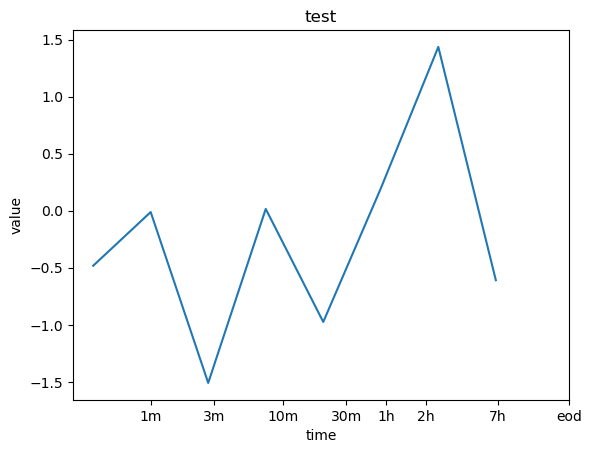

In [51]:
import matplotlib.pyplot as plt
time_horizon = ['1m', '3m', '10m', '30m', '1h', '2h', '7h', 'eod']

#plot a graph with x axis as time_horizon, properly located by the actual time
def plot_time_horizon(data, title = "", xlabel = "", ylabel = ""):
    x_locate = [1, 3, 10, 30, 60, 120, 420, 1440]
    x_locate = np.log(x_locate) + 1
    plt.plot(data)
    plt.xticks(x_locate, time_horizon)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

data = np.random.randn(8)
plot_time_horizon(data, title = "test", xlabel = "time", ylabel = "value")


In [29]:
filtered_D = data['D'].map(filt_func)

AttributeError: 'DataArray' object has no attribute 'map'

In [20]:
xr.apply_ufunc(filt_func, data['D'])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
#load path/YYMMDD-UKEY.tblc file for each day
import os
import datetime
import cpptable

date = datetime.datetime(2023, 3, 1)
path = 'path/YYMMDD-UKEY.tblc'

cpptable.read_table(path.replace('YYMMDD', date.strftime('%y%m%d')))


In [48]:
#for each datapoint in second // 60 then * 60 to get the minute
import numpy as np
import xarray as xr
import pandas as pd

data = pd.DataFrame({'time': pd.date_range('2020-01-01', periods=10, freq='s'), 'value': np.random.randn(10)})
data['second'] = data['time'].dt.second


In [49]:
#for each data rowa:
for i, row in data.iterrows():
    print(row['time'], row['value'])

,time,value,second
0,2020-01-01 00:00:00,0.945804,0
1,2020-01-01 00:00:01,1.370975,1
2,2020-01-01 00:00:02,0.491514,2
3,2020-01-01 00:00:03,-0.904739,3
4,2020-01-01 00:00:04,0.435679,4
5,2020-01-01 00:00:05,-0.285310,5
6,2020-01-01 00:00:06,1.093225,6
7,2020-01-01 00:00:07,0.436733,7
8,2020-01-01 00:00:08,-1.042579,8
9,2020-01-01 00:00:09,-0.767006,9


In [ ]:
def remore_parentheses(string):
    #extract the string in the parentheses
    if "(" not in string:
        return string
    return string[string.find("(") + 1 : string.find(")")]

#remove parentheses for all elements in a data['D']
data['D'] = data['D'].apply(remore_parentheses)